<a href="https://colab.research.google.com/github/zbegum2/Data110/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Data Cleaning:

In [2]:
import pandas as pd

df = pd.read_csv('/content/Daily_Arrests_20241118.csv')

new_df = df.dropna()

print(new_df.to_string())

               LAST NAME   FIRST NAME      MIDDLE NAME  AGE                                 STREET                CITY STATE ARREST DATE                                                                                             OFFENSE
0              ALVARENGA      WILLIAM           ALEXIS   20            18000 Block Of Driftwood ct        GAITHERSBURG    MD  11/06/2024                                                                                ASSAULT-FIRST DEGREE
1                  LUCAS         ALAN             MARK   70             13300 Block Of BRACKLER RD       SILVER SPRING    MD  11/06/2024                       DRIVING/ATTEMPTING DRIVE MOTOR VEH. ON HWY W/O REQ. LICENSE AND AUTHORIZATION
2                  LEWIS        RAKIM            ALBOO   26            12100 Block Of SKIP JACK DR          GERMANTOWN    MD  11/06/2024                                                                                  DISORDERLY CONDUCT
3                 MORRIS     BRITTANY           NICO

In [3]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
411    False
412    False
413    False
414    False
415    False
Length: 416, dtype: bool


In [5]:
filtered_data = df[df['OFFENSE'].str.contains('theft', case=False, na=False)]
print(filtered_data)

               LAST NAME FIRST NAME MIDDLE NAME  AGE  \
10             VELAZQUEZ   ANDERSON    DOMINGOS   20   
14                GREENE    MICHAEL     ANTHONY   30   
27       VASQUEZ LINARES      ABNER         NaN   26   
30                HARPER      KHARI      XAVIER   32   
31               ROSALES     HERSON       DAVID   34   
..                   ...        ...         ...  ...   
394        MERCADO-RAMOS     EFRAIN         NaN   49   
404              FRAZIER     JAZMIN         ANN   26   
407  RODRIGUEZ-HERNANDEZ      OSCAR     ERNESTO   25   
411                  DAY      TYRAY       GREEN   19   
415              FRAZIER     SHALAL       HIRAM   18   

                              STREET           CITY STATE ARREST DATE  \
10     12900 Block Of HATWAWAY DRIVE  SILVER SPRING    MD  11/07/2024   
14       11700 Block Of TROPHY COURT     GERMANTOWN    MD  11/07/2024   
27       12100 Block Of BLUE HILL RD  SILVER SPRING    MD  11/07/2024   
30        14400 Block Of BELL PRE R

In [8]:
import pandas as pd

df = pd.read_csv('/content/Daily_Arrests_20241118.csv')

theft_df = df[df['OFFENSE'].str.contains('theft', case=False, na=False)]

print(theft_df)


               LAST NAME FIRST NAME MIDDLE NAME  AGE  \
10             VELAZQUEZ   ANDERSON    DOMINGOS   20   
14                GREENE    MICHAEL     ANTHONY   30   
27       VASQUEZ LINARES      ABNER         NaN   26   
30                HARPER      KHARI      XAVIER   32   
31               ROSALES     HERSON       DAVID   34   
..                   ...        ...         ...  ...   
394        MERCADO-RAMOS     EFRAIN         NaN   49   
404              FRAZIER     JAZMIN         ANN   26   
407  RODRIGUEZ-HERNANDEZ      OSCAR     ERNESTO   25   
411                  DAY      TYRAY       GREEN   19   
415              FRAZIER     SHALAL       HIRAM   18   

                              STREET           CITY STATE ARREST DATE  \
10     12900 Block Of HATWAWAY DRIVE  SILVER SPRING    MD  11/07/2024   
14       11700 Block Of TROPHY COURT     GERMANTOWN    MD  11/07/2024   
27       12100 Block Of BLUE HILL RD  SILVER SPRING    MD  11/07/2024   
30        14400 Block Of BELL PRE R

In [9]:
theft_count = df['OFFENSE'].str.contains('theft', case=False, na=False).sum()
print(f"Total rows with 'theft': {theft_count}")


Total rows with 'theft': 82


In [10]:
age_range = theft_df['AGE'].min(), theft_df['AGE'].max()
print(f"Age range for theft offenses: {age_range[0]} to {age_range[1]}")


Age range for theft offenses: 18 to 69


EDA:
What is the total number of theft incidents? 82 Incidents

What is the range of ages involved in theft offenses? Ranges from age 18 to 69.

In [19]:
print(df.columns)


Index(['LAST NAME', 'FIRST NAME', 'MIDDLE NAME', 'AGE', 'STREET', 'CITY',
       'STATE', 'ARREST DATE', 'OFFENSE'],
      dtype='object')


In [39]:
import pandas as pd

df = pd.read_csv('/content/Daily_Arrests_20241118.csv')

filtered_data = df[df['OFFENSE'].str.contains('theft', case=False, na=False)].copy()

filtered_data['ARREST DATE'] = pd.to_datetime(filtered_data['ARREST DATE'])

filtered_data['day_of_week'] = filtered_data['ARREST DATE'].dt.day_name()

most_common_day = filtered_data['day_of_week'].value_counts().idxmax()

print(f"Day of the week with the most theft arrests: {most_common_day}")


Day of the week with the most theft arrests: Friday


The reason for this trend to be on a Friday might be because Friday's are usually the end of someone's work week and they can possibly be drinking more alcohol on Fridays. Also places are busier on Fridays, especially looking at an example like Black Friday sale, it would be a better time for theft because there would be too many people around.

In [27]:

most_common_age = filtered_data['AGE'].mode()[0]

print(f"The most common age in theft offenses is: {most_common_age}")


The most common age in theft offenses is: 26


Age Distribution:
After a rough review over the data in thefts, it seems to me that the ages mainly range from 20-35. After seeing the most common age is 26, I realize I was right, after skimming through the 82 ages. I think it makes sense as to why this age range is the most popular in theft. Theft requires quite a bit of energy to flee the scene, and people under the age of 30 will definitely have that type of energy, also they are much younger and will probably not make the best decisions.

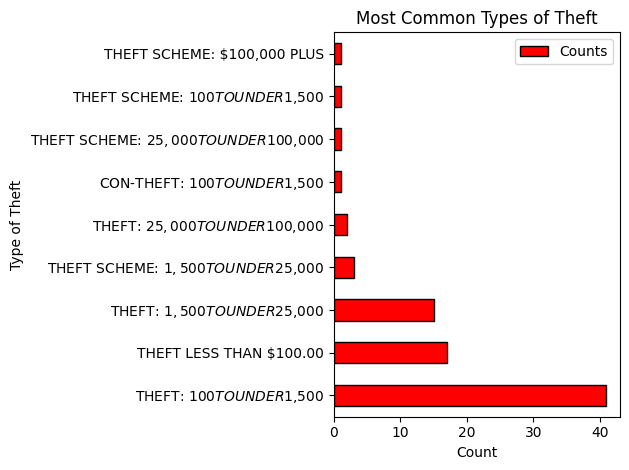

In [40]:
filtered_data = df[df['OFFENSE'].str.contains('theft', case=False, na=False)]

theft_counts = filtered_data['OFFENSE'].value_counts()

theft_counts.plot(kind='barh', color='red', edgecolor='black', label='Counts')

plt.xlabel('Count')
plt.ylabel('Type of Theft')
plt.title('Most Common Types of Theft')

plt.legend()

plt.tight_layout()
plt.show()


It seems that a lot of theifs usually go for under 1,500 dollars because it is probably easier to get than 25k. I assume that stealing less money would get lower charges which is probably why it is more common. The penalty for stealing less than a thousand is considered a *misdemeanor* instead of an actual felony. With this, it must be reassuring for people to steal. Also instead of going to jail, they would probably just be fined, and be forced to return the stolen money anyways.

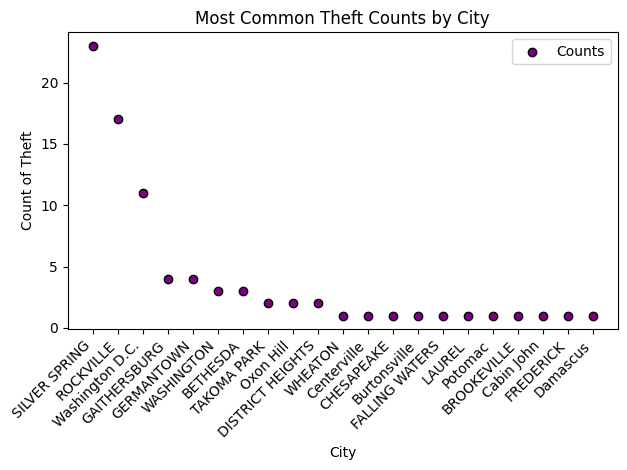

In [38]:
filtered_data = df[df['OFFENSE'].str.contains('theft', case=False, na=False)]

theft_by_city = filtered_data['CITY'].value_counts()

plt.scatter(theft_by_city.index, theft_by_city.values, color='purple', edgecolor='black', label='Counts')

plt.xlabel('City')
plt.ylabel('Count of Theft')
plt.title('Most Common Theft Counts by City')

plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()
plt.show()


Adding this scatterplot is very informing and clearly shows which areas in Maryland are the most common in thefts, which is Silver Spring. For me this would be very important information because Silver Spring is not too far from me in Gaithersburg. But as I see on the scatterplot, Gaithersburg is still the 4th highest in thefts, so it isn't the safest.

Conclusion:
The analysis of the Theft in Maryland has been pretty informing, especially finding out that Fridays are the most common days for theft. It is also very interesting to know that most thieves are around the age of 26 years old. These patterns would be good for the Maryland Police Department to build some prevention techniques into their system.